In [1]:
import pandas as pd
import numpy as np
# import matplotlib
# matplotlib.use('Agg')
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("Data/ks-projects-201801.csv")

In [3]:
# Get a quick visual on what the dataframe looks like
print(df.head(5))

           ID                                               name  \
0  1000002330                    The Songs of Adelaide & Abullah   
1  1000003930      Greeting From Earth: ZGAC Arts Capsule For ET   
2  1000004038                                     Where is Hank?   
3  1000007540  ToshiCapital Rekordz Needs Help to Complete Album   
4  1000011046  Community Film Project: The Art of Neighborhoo...   

         category main_category currency    deadline     goal  \
0          Poetry    Publishing      GBP  2015-10-09   1000.0   
1  Narrative Film  Film & Video      USD  2017-11-01  30000.0   
2  Narrative Film  Film & Video      USD  2013-02-26  45000.0   
3           Music         Music      USD  2012-04-16   5000.0   
4    Film & Video  Film & Video      USD  2015-08-29  19500.0   

              launched  pledged     state  backers country  usd pledged  \
0  2015-08-11 12:12:28      0.0    failed        0      GB          0.0   
1  2017-09-02 04:43:57   2421.0    failed       15

In [4]:

# Choose a topic that may be interesting to study:
# Let's get a visual on successes and failures based on goal size
df['state_binary'] = df['state'].apply(lambda s: True if s == "successful" else False)

In [5]:
print(df.head(7))

           ID                                               name  \
0  1000002330                    The Songs of Adelaide & Abullah   
1  1000003930      Greeting From Earth: ZGAC Arts Capsule For ET   
2  1000004038                                     Where is Hank?   
3  1000007540  ToshiCapital Rekordz Needs Help to Complete Album   
4  1000011046  Community Film Project: The Art of Neighborhoo...   
5  1000014025                               Monarch Espresso Bar   
6  1000023410  Support Solar Roasted Coffee & Green Energy!  ...   

         category main_category currency    deadline     goal  \
0          Poetry    Publishing      GBP  2015-10-09   1000.0   
1  Narrative Film  Film & Video      USD  2017-11-01  30000.0   
2  Narrative Film  Film & Video      USD  2013-02-26  45000.0   
3           Music         Music      USD  2012-04-16   5000.0   
4    Film & Video  Film & Video      USD  2015-08-29  19500.0   
5     Restaurants          Food      USD  2016-04-01  50000.0   


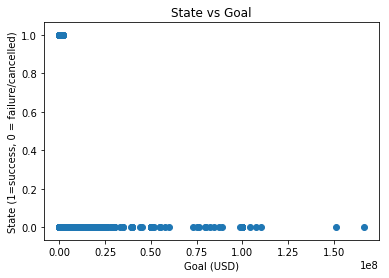

In [6]:
# Choose a topic that may be interesting to study:
# Let's get a visual on successes and failures based on goal size
df['state_binary'] = df['state'].apply(lambda s: True if s == "successful" else False)
fig1, ax1 = plt.subplots()
ax1.scatter(df['usd_goal_real'], df['state_binary'])
ax1.set_xlabel('Goal (USD)')
ax1.set_ylabel('State (1=success, 0 = failure/cancelled)')
ax1.set_title('State vs Goal')
plt.show(block=False)
fig1.set_figheight(5)
fig1.set_figwidth(5)

In [7]:
print()
print("Total number of successes = {:d}".format(np.sum(df['state_binary'])))
print("Total number of failures and cancelled = {:d}".format(np.sum(~df['state_binary'])))
print("This means that about {:.2f}% of Kickstarter campaigns in our data were successful".format((np.sum(df['state_binary'])/df.shape[0]) * 100))


Total number of successes = 133956
Total number of failures and cancelled = 244705
This means that about 35.38% of Kickstarter campaigns in our data were successful


In [8]:
# given our graph, this is somewhat surprising. It's obvious that almost all the successes are
# clustered in a certain goal range. Let's choose some bin ranges along the goal axis and plot
# a bar graph of the percentage of campaigns that were successful in each bin in order to see if anything
# stands out

# bin ranges: 0-10, 11-100, 101-1000, 1001-10000, 10001-100000, 100001-1000000

bin_ranges = ((0, 10), (11, 100), (101, 1000), (1001, 10000), (10001, 100000), (100001, 1000000))
def get_att_in_range(df, lower, upper):
    return df[df['usd_goal_real'].between(lower, upper, inclusive=True)].shape[0]

def get_succ_in_range(df, lower, upper):
    return sum(df[df['usd_goal_real'].between(lower, upper, inclusive=True)]['state_binary'])

def get_perc_suc_in_range(df, lower, upper):
    return get_succ_in_range(df, lower, upper)/get_att_in_range(df, lower, upper) * 100

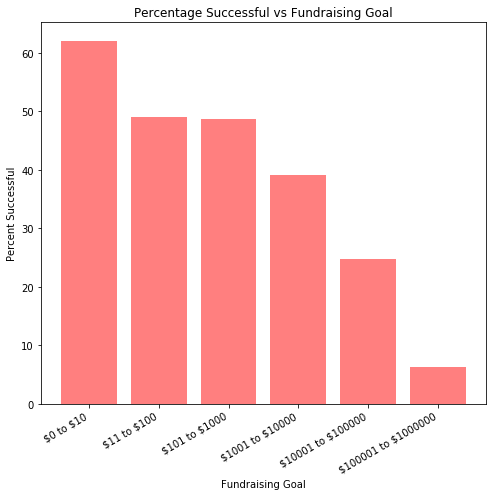

In [9]:
fig2, ax2 = plt.subplots()
percent_succ_in_range = [get_perc_suc_in_range(df, br[0], br[1]) for br in bin_ranges]
b1, b2, b3, b4, b5, b6 = ax2.bar(np.arange(1,7), percent_succ_in_range, color='r', alpha=0.5)
x_labs = ["\$"+ str(br[0]) + " to \$" +str(br[1]) for br in bin_ranges]
ax2.set_xticks(np.arange(1,7))
ax2.set_xticklabels(x_labs, rotation=30, ha='right')
ax2.set_xlabel('Fundraising Goal')
ax2.set_ylabel('Percent Successful')
ax2.set_title('Percentage Successful vs Fundraising Goal')
fig2.set_figheight(7)
fig2.set_figwidth(7)
plt.tight_layout()
plt.show(block=False)

In [10]:
# This is somewhat interesting, but may be misleading because it's not obvious
# how many kickstarter attempts were made in each range

# If we instead plot successful over total attempts in each range we get a
# better view of the data

def label_rects(ax, rects, labs):
    i = 0
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                labs[i], ha='center', va='bottom')
        i+=1

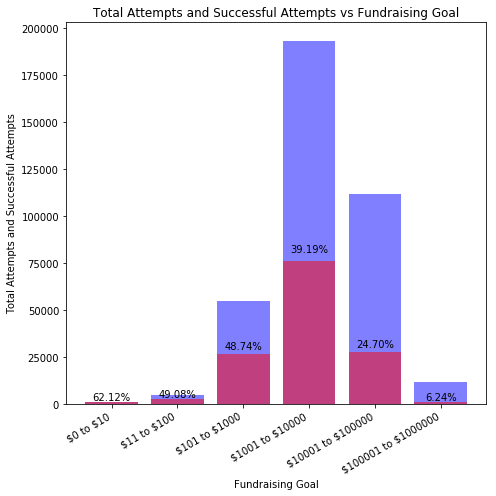

In [11]:
fig3, ax3 = plt.subplots()
att_in_range = np.array([get_att_in_range(df, br[0], br[1]) for br in bin_ranges])
succ_in_range = np.array([get_succ_in_range(df, br[0], br[1]) for br in bin_ranges])
ax3.bar(np.arange(1,7), att_in_range, color='b', alpha=0.5)
rects = ax3.bar(np.arange(1,7), succ_in_range, color='r', alpha=0.5)
x_labs = ["\$"+ str(br[0]) + " to \$" +str(br[1]) for br in bin_ranges]
bar_labs = ["{:.2f}".format(perc) + "%" for perc in percent_succ_in_range]
ax3.set_xticks(np.arange(1,7))
ax3.set_xticklabels(x_labs, rotation=30, ha='right')
ax3.set_xlabel('Fundraising Goal')
ax3.set_ylabel('Total Attempts and Successful Attempts')
ax3.set_title('Total Attempts and Successful Attempts vs Fundraising Goal')
label_rects(ax3, rects, bar_labs)
fig3.set_figheight(7)
fig3.set_figwidth(7)
plt.tight_layout()
plt.show(block=False)

In [16]:
# From that we can see that most of the interesting data lies in kickstarter campaigns
# between $100 and $100,000

# Let's create a histogram to get a higher resolution image of what's going on in that range
def get_df_att_in_range(df, lower, upper):
    return df[df['usd_goal_real'].between(lower, upper, inclusive=True)]

def get_df_succ_in_range(df, lower, upper):
    temp = df[df['usd_goal_real'].between(lower, upper, inclusive=True)]
    return temp.loc[temp['state_binary'] == True]

In [17]:
df_succ = get_df_succ_in_range(df, 100, 100000)
df_att = get_df_att_in_range(df, 100, 100000)


In [18]:
def label_bins(ax, n_perc, bins, n_succ):
    bin_centers = 0.5 * np.diff(bins) + bins[:-1]
    for perc, x, n in zip(n_perc, bin_centers, n_succ):
        ax.annotate("{:.0f}".format(perc)+"%", xy=(x, n), xycoords='data',
            xytext=(0, 10), textcoords='offset points', va='top', ha='center')

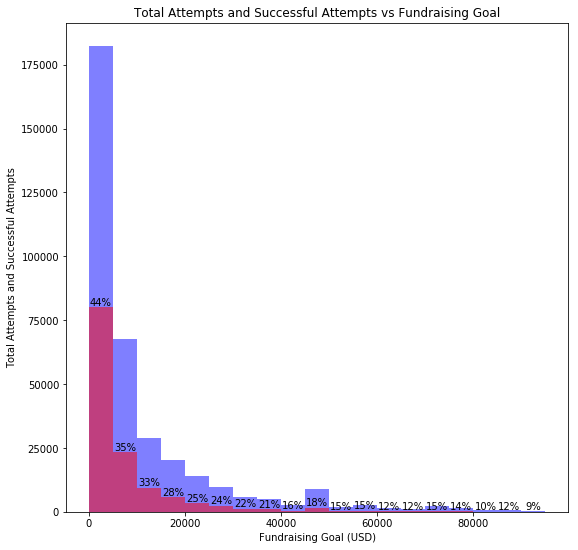

In [19]:
fig4, ax4 = plt.subplots()
hist_bins = [x for x in range(1, 100001, 5000)]
n_att, bins2, p2 = ax4.hist(df_att['usd_goal_real'], bins=hist_bins, color='b', alpha=0.5)
n_succ, bins, p = ax4.hist(df_succ['usd_goal_real'], bins=hist_bins, color='r', alpha=0.5)
n_perc = n_succ/n_att * 100
ax4.set_xlabel('Fundraising Goal (USD)')
ax4.set_ylabel('Total Attempts and Successful Attempts')
ax4.set_title('Total Attempts and Successful Attempts vs Fundraising Goal')
label_bins(ax4, n_perc, bins, n_succ)
fig4.set_figheight(9)
fig4.set_figwidth(9)